In [88]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
import os
import sys
from tqdm import tqdm

In [90]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

### 数据处理：Polynomial

In [4]:
training_data = pd.read_csv('./train.csv').drop('id', axis=1)
test_data = pd.read_csv('./test.csv').drop('id',axis=1)
training_data['n_jobs'].loc[training_data['n_jobs']==-1] = 16
test_data['n_jobs'].loc[test_data['n_jobs']==-1] = 16
training_label = training_data['time']
data_corr = training_data.corr()['time']

C:\Users\hanya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
all_data = pd.concat([training_data.drop('time',axis=1), test_data])#.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)

In [6]:
# 特征构造
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_jobs'] = all_data['max_iter']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']
all_data['n_samples_n_features'] = all_data['n_samples']*all_data['n_features']
all_data['n_samples_n_features_max_iter'] = all_data['n_samples']*all_data['n_features']*all_data['max_iter']

In [7]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
#all_data['n_jobs-1'] = all_data['n_jobs']**(-1)
#all_data['n_jobs-2'] = all_data['n_jobs']**(-2)
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]

In [8]:
cols = all_data1.columns
for col1 in range(len(cols)):
    for col2 in range(col1, len(cols)):
        c1 = cols[col1]
        c2 = cols[col2]
        all_data1[str(c1)+'_'+str(c2)] = all_data1[c1] * all_data1[c2]

In [115]:
new_data = pd.get_dummies(all_data)
training_len = 440 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = np.log1p(training_label.iloc[:training_len]) # training labels--cross validation
y_train_test = np.log1p(training_label.iloc[-test_training:]) # training label--test
X_test = new_data.iloc[-test_len:, :] # test data

### Neural Network

In [116]:
def model_nn(X_train, y_train, X_train_test, y_train_test):
    x_train = X_train
    y_train = y_train
    x_test = X_train_test
    y_test = y_train_test

    model = Sequential()
    model.add(Dense(200, activation='relu', input_dim=16))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))

    adm = Adam(lr=0.01, decay=1e-6)
    model.compile(loss='mean_squared_error',
                  optimizer=adm)

    model.fit(x_train, y_train,
              epochs=1000,
              batch_size=380)
    #score = model.evaluate(x_test, y_test, batch_size=60)
    return model#, score

In [138]:
md = []
N = 20
for i in range(N):
    md.append(model_nn(X_train, y_train, X_train_test, y_train_test))

Epoch 1/1000
440/440 [==============================] - ETA: 0s - loss: 1.055 - 0s 791us/step - loss: 1.2199
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 0.541 - 0s 43us/step - loss: 0.5558
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 0.999 - 0s 54us/step - loss: 0.9530
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 0.549 - 0s 45us/step - loss: 0.5265
Epoch 5/1000
440/440 [==============================] - ETA: 0s - loss: 0.288 - 0s 39us/step - loss: 0.2778
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 0.346 - 0s 54us/step - loss: 0.3619
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 0.288 - 0s 41us/step - loss: 0.2841
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 0.261 - 0s 36us/step - loss: 0.2731
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 0.264 - 0s 45us/step - loss: 0.2477
Epoch 10/1000
440/440 [====

440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 36us/step - loss: 0.0800
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0673
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 39us/step - loss: 0.0685
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0651
Epoch 80/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0664
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 39us/step - loss: 0.0536
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 39us/step - loss: 0.0662
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0719
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 48us/step - loss: 0.0780
Epoch 85/1000
440/440 [==========

Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 34us/step - loss: 0.0530
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0533
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 57us/step - loss: 0.0512
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0528
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0522
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0482
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 59us/step - loss: 0.0534
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 61us/step - loss: 0.0573
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 57us/step - loss: 0.0448
Epoch 160/

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 39us/step - loss: 0.0433
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 39us/step - loss: 0.0450
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0668
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 39us/step - loss: 0.0554
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 39us/step - loss: 0.0607
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0575
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 41us/step - loss: 0.0421
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 43us/step - loss: 0.0458
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 39us/step - loss: 0.0598
Epoch 234/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 39us/step - loss: 0.0352
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0403
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 39us/step - loss: 0.0400
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 39us/step - loss: 0.0531
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 41us/step - loss: 0.0352
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0362
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0394
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0349
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 39us/step - loss: 0.0470
Epoch 308/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0426
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 41us/step - loss: 0.0348
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 48us/step - loss: 0.0394
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 48us/step - loss: 0.0362
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 54us/step - loss: 0.0433
Epoch 378/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 61us/step - loss: 0.0381
Epoch 379/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 57us/step - loss: 0.0398
Epoch 380/1000
440/440 [==============================] - ETA: 0s - loss: 0.027 - 0s 54us/step - loss: 0.0286
Epoch 381/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 50us/step - loss: 0.0358
Epoch 382/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0321
Epoch 448/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0438
Epoch 449/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0417
Epoch 450/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 68us/step - loss: 0.0414
Epoch 451/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 54us/step - loss: 0.0314
Epoch 452/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 41us/step - loss: 0.0395
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 39us/step - loss: 0.0362
Epoch 454/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 39us/step - loss: 0.0407
Epoch 455/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0386
Epoch 456/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.029 - 0s 43us/step - loss: 0.0306
Epoch 522/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 50us/step - loss: 0.0564
Epoch 523/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 48us/step - loss: 0.0420
Epoch 524/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 66us/step - loss: 0.0395
Epoch 525/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 59us/step - loss: 0.0376
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 54us/step - loss: 0.0482
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 41us/step - loss: 0.0489
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 61us/step - loss: 0.0418
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 0.090 - 0s 41us/step - loss: 0.0824
Epoch 530/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0496
Epoch 596/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 52us/step - loss: 0.0438
Epoch 597/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0403
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 39us/step - loss: 0.0362
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0372
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 39us/step - loss: 0.0549
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 39us/step - loss: 0.0355
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0465
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 63us/step - loss: 0.0419
Epoch 604/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 39us/step - loss: 0.0354
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 41us/step - loss: 0.0445
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 39us/step - loss: 0.0362
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0417
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0388
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 43us/step - loss: 0.0446
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 43us/step - loss: 0.0381
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 52us/step - loss: 0.0407
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 45us/step - loss: 0.0426
Epoch 678/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 41us/step - loss: 0.0362
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0396
Epoch 745/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 39us/step - loss: 0.0422
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 39us/step - loss: 0.0356
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 48us/step - loss: 0.0431
Epoch 748/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0443
Epoch 749/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 41us/step - loss: 0.0410
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 39us/step - loss: 0.0403
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 45us/step - loss: 0.0369
Epoch 752/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 34us/step - loss: 0.0460
Epoch 818/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0410
Epoch 819/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 39us/step - loss: 0.0400
Epoch 820/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 45us/step - loss: 0.0454
Epoch 821/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0458
Epoch 822/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0479
Epoch 823/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0434
Epoch 824/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 50us/step - loss: 0.0646
Epoch 825/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 41us/step - loss: 0.0463
Epoch 826/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0409
Epoch 892/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 39us/step - loss: 0.0490
Epoch 893/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 50us/step - loss: 0.0394
Epoch 894/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 41us/step - loss: 0.0434
Epoch 895/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 41us/step - loss: 0.0350
Epoch 896/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0566
Epoch 897/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 39us/step - loss: 0.0462
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0603
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0417
Epoch 900/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 39us/step - loss: 0.0424
Epoch 966/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0411
Epoch 967/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0520
Epoch 968/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0380
Epoch 969/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 50us/step - loss: 0.0433
Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 43us/step - loss: 0.0514
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 57us/step - loss: 0.0397
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 50us/step - loss: 0.0457
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 50us/step - loss: 0.0444
Epoch 974/1000
440/440 [=

Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 41us/step - loss: 0.0771
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 0.087 - 0s 45us/step - loss: 0.0860
Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 0.092 - 0s 39us/step - loss: 0.0895
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0807
Epoch 44/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 43us/step - loss: 0.0812
Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 59us/step - loss: 0.0661
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 100us/step - loss: 0.0851
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 79us/step - loss: 0.0768
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 75us/step - loss: 0.0822
Epoch 49/1000
440/

Epoch 115/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 63us/step - loss: 0.0517
Epoch 116/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 41us/step - loss: 0.0495
Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 61us/step - loss: 0.0683
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 70us/step - loss: 0.0512
Epoch 119/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 50us/step - loss: 0.0782
Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 66us/step - loss: 0.0597
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 50us/step - loss: 0.0488
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 54us/step - loss: 0.0606
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 50us/step - loss: 0.0570
Epoch 124/

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 43us/step - loss: 0.0361
Epoch 190/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 52us/step - loss: 0.0654
Epoch 191/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 48us/step - loss: 0.0510
Epoch 192/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 50us/step - loss: 0.0526
Epoch 193/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 66us/step - loss: 0.0413
Epoch 194/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 75us/step - loss: 0.0516
Epoch 195/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 57us/step - loss: 0.0386
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 57us/step - loss: 0.0496
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 57us/step - loss: 0.0569
Epoch 198/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 43us/step - loss: 0.0465
Epoch 264/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 41us/step - loss: 0.0453
Epoch 265/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 41us/step - loss: 0.0509
Epoch 266/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 63us/step - loss: 0.0386
Epoch 267/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 54us/step - loss: 0.0486
Epoch 268/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 45us/step - loss: 0.0423
Epoch 269/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 43us/step - loss: 0.0447
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 39us/step - loss: 0.0377
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 45us/step - loss: 0.0430
Epoch 272/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 41us/step - loss: 0.0642
Epoch 338/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 57us/step - loss: 0.0532
Epoch 339/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 52us/step - loss: 0.0385
Epoch 340/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 57us/step - loss: 0.0541
Epoch 341/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 54us/step - loss: 0.0406
Epoch 342/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 120us/step - loss: 0.0517
Epoch 343/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 68us/step - loss: 0.0361
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 54us/step - loss: 0.0475
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 63us/step - loss: 0.0456
Epoch 346/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 41us/step - loss: 0.0468
Epoch 412/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 48us/step - loss: 0.0448
Epoch 413/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 48us/step - loss: 0.0472
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 45us/step - loss: 0.0428
Epoch 415/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 52us/step - loss: 0.0396
Epoch 416/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 45us/step - loss: 0.0393
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 48us/step - loss: 0.0371
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 45us/step - loss: 0.0311
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 39us/step - loss: 0.0366
Epoch 420/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 45us/step - loss: 0.0465
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 43us/step - loss: 0.0394
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 79us/step - loss: 0.0429
Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 77us/step - loss: 0.0436
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 59us/step - loss: 0.0411
Epoch 490/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 73us/step - loss: 0.0436
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 54us/step - loss: 0.0363
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 57us/step - loss: 0.0522
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 41us/step - loss: 0.0458
Epoch 494/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 43us/step - loss: 0.0427
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 52us/step - loss: 0.0505
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 52us/step - loss: 0.0417
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 59us/step - loss: 0.0420
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 50us/step - loss: 0.0485
Epoch 564/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 52us/step - loss: 0.0390
Epoch 565/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 68us/step - loss: 0.0466
Epoch 566/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 59us/step - loss: 0.0422
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 45us/step - loss: 0.0438
Epoch 568/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 50us/step - loss: 0.0407
Epoch 634/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 52us/step - loss: 0.0474
Epoch 635/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 43us/step - loss: 0.0561
Epoch 636/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0413
Epoch 637/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 52us/step - loss: 0.0547
Epoch 638/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 57us/step - loss: 0.0403
Epoch 639/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 61us/step - loss: 0.0438
Epoch 640/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 50us/step - loss: 0.0335
Epoch 641/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 54us/step - loss: 0.0508
Epoch 642/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0354
Epoch 708/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 45us/step - loss: 0.0391
Epoch 709/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 45us/step - loss: 0.0358
Epoch 710/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 50us/step - loss: 0.0321
Epoch 711/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 48us/step - loss: 0.0377
Epoch 712/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 52us/step - loss: 0.0406
Epoch 713/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 48us/step - loss: 0.0350
Epoch 714/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 54us/step - loss: 0.0364
Epoch 715/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 50us/step - loss: 0.0446
Epoch 716/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 50us/step - loss: 0.0472
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 45us/step - loss: 0.0395
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 41us/step - loss: 0.0423
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 45us/step - loss: 0.0361
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 39us/step - loss: 0.0532
Epoch 786/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 43us/step - loss: 0.0460
Epoch 787/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 45us/step - loss: 0.0480
Epoch 788/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 61us/step - loss: 0.0429
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 45us/step - loss: 0.0516
Epoch 790/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0458
Epoch 856/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 41us/step - loss: 0.0534
Epoch 857/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 43us/step - loss: 0.0547
Epoch 858/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 39us/step - loss: 0.0400
Epoch 859/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 57us/step - loss: 0.0433
Epoch 860/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 41us/step - loss: 0.0503
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 50us/step - loss: 0.0448
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 48us/step - loss: 0.0386
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 43us/step - loss: 0.0405
Epoch 864/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 52us/step - loss: 0.0607
Epoch 930/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 41us/step - loss: 0.0472
Epoch 931/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 45us/step - loss: 0.0596
Epoch 932/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0394
Epoch 933/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 48us/step - loss: 0.0482
Epoch 934/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 57us/step - loss: 0.0583
Epoch 935/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 59us/step - loss: 0.0477
Epoch 936/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 54us/step - loss: 0.0425
Epoch 937/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 54us/step - loss: 0.0466
Epoch 938/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.741 - 0s 36us/step - loss: 0.7575
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 1.083 - 0s 48us/step - loss: 1.0924
Epoch 5/1000
440/440 [==============================] - ETA: 0s - loss: 0.922 - 0s 45us/step - loss: 0.9261
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 0.630 - 0s 50us/step - loss: 0.6100
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 0.449 - 0s 45us/step - loss: 0.4643
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 0.433 - 0s 41us/step - loss: 0.4389
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 0.426 - 0s 61us/step - loss: 0.4137
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 0.302 - 0s 68us/step - loss: 0.3059
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 0.295 - 0s 52us/step - loss: 0.2852
Epoch 12/1000
440/440 [================

440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 52us/step - loss: 0.0836
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 59us/step - loss: 0.0771
Epoch 80/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 45us/step - loss: 0.0767
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 39us/step - loss: 0.0722
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 59us/step - loss: 0.0837
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 45us/step - loss: 0.0699
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 0.075 - 0s 43us/step - loss: 0.0716
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 0.096 - 0s 45us/step - loss: 0.0949
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 43us/step - loss: 0.0674
Epoch 87/1000
440/440 [==========

Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 43us/step - loss: 0.0581
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 48us/step - loss: 0.0521
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 43us/step - loss: 0.0569
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 45us/step - loss: 0.0543
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0665
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0491
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 45us/step - loss: 0.0478
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0519
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 45us/step - loss: 0.0629
Epoch 162/

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 41us/step - loss: 0.0439
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 39us/step - loss: 0.0412
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 39us/step - loss: 0.0408
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0510
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 41us/step - loss: 0.0408
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0489
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 54us/step - loss: 0.0410
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0435
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0491
Epoch 236/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 41us/step - loss: 0.0529
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 48us/step - loss: 0.0466
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 45us/step - loss: 0.0559
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 48us/step - loss: 0.0343
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0336
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 88us/step - loss: 0.0502
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 168us/step - loss: 0.0458
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 52us/step - loss: 0.0404
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 79us/step - loss: 0.0553
Epoch 310/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0482
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 59us/step - loss: 0.0417
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 39us/step - loss: 0.0423
Epoch 378/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 43us/step - loss: 0.0437
Epoch 379/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 39us/step - loss: 0.0434
Epoch 380/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 43us/step - loss: 0.0465
Epoch 381/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 52us/step - loss: 0.0440
Epoch 382/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 48us/step - loss: 0.0598
Epoch 383/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 59us/step - loss: 0.0359
Epoch 384/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 39us/step - loss: 0.0362
Epoch 450/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 43us/step - loss: 0.0386
Epoch 451/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 48us/step - loss: 0.0389
Epoch 452/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 43us/step - loss: 0.0439
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 63us/step - loss: 0.0338
Epoch 454/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 45us/step - loss: 0.0356
Epoch 455/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 41us/step - loss: 0.0330
Epoch 456/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 48us/step - loss: 0.0378
Epoch 457/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 50us/step - loss: 0.0338
Epoch 458/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 54us/step - loss: 0.0537
Epoch 524/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 57us/step - loss: 0.0329
Epoch 525/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 50us/step - loss: 0.0420
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 61us/step - loss: 0.0375
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 54us/step - loss: 0.0398
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 52us/step - loss: 0.0447
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 68us/step - loss: 0.0511
Epoch 530/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 41us/step - loss: 0.0399
Epoch 531/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 39us/step - loss: 0.0350
Epoch 532/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 54us/step - loss: 0.0418
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 41us/step - loss: 0.0294
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 59us/step - loss: 0.0381
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 66us/step - loss: 0.0411
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 52us/step - loss: 0.0363
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 45us/step - loss: 0.0357
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 52us/step - loss: 0.0338
Epoch 604/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 48us/step - loss: 0.0325
Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 50us/step - loss: 0.0362
Epoch 606/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 73us/step - loss: 0.0408
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 57us/step - loss: 0.0326
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 54us/step - loss: 0.0376
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 66us/step - loss: 0.0370
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 144us/step - loss: 0.0290
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 127us/step - loss: 0.0387
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 141us/step - loss: 0.0384
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 200us/step - loss: 0.0394
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 54us/step - loss: 0.0378
Epoch 680/1000
440/44

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 63us/step - loss: 0.0390
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 54us/step - loss: 0.0547
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 59us/step - loss: 0.0365
Epoch 748/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 68us/step - loss: 0.0411
Epoch 749/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 93us/step - loss: 0.0439
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 75us/step - loss: 0.0499
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 79us/step - loss: 0.0416
Epoch 752/1000
440/440 [==============================] - ETA: 0s - loss: 0.027 - 0s 66us/step - loss: 0.0287
Epoch 753/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 61us/step - loss: 0.0424
Epoch 754/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 39us/step - loss: 0.0440
Epoch 820/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 43us/step - loss: 0.0430
Epoch 821/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 159us/step - loss: 0.0549
Epoch 822/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 54us/step - loss: 0.0352
Epoch 823/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0388
Epoch 824/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 48us/step - loss: 0.0507
Epoch 825/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 43us/step - loss: 0.0473
Epoch 826/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 45us/step - loss: 0.0508
Epoch 827/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 39us/step - loss: 0.0535
Epoch 828/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 61us/step - loss: 0.0452
Epoch 946/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 61us/step - loss: 0.0485
Epoch 947/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 75us/step - loss: 0.0504
Epoch 948/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 50us/step - loss: 0.0421
Epoch 949/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 50us/step - loss: 0.0452
Epoch 950/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 66us/step - loss: 0.0451
Epoch 951/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 54us/step - loss: 0.0525
Epoch 952/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 52us/step - loss: 0.0452
Epoch 953/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 66us/step - loss: 0.0680
Epoch 954/1000
440/440 [=

Epoch 20/1000
440/440 [==============================] - ETA: 0s - loss: 0.169 - 0s 59us/step - loss: 0.1624
Epoch 21/1000
440/440 [==============================] - ETA: 0s - loss: 0.217 - 0s 63us/step - loss: 0.2136
Epoch 22/1000
440/440 [==============================] - ETA: 0s - loss: 0.161 - 0s 70us/step - loss: 0.1542
Epoch 23/1000
440/440 [==============================] - ETA: 0s - loss: 0.143 - 0s 75us/step - loss: 0.1440
Epoch 24/1000
440/440 [==============================] - ETA: 0s - loss: 0.147 - 0s 59us/step - loss: 0.1388
Epoch 25/1000
440/440 [==============================] - ETA: 0s - loss: 0.163 - 0s 43us/step - loss: 0.1502
Epoch 26/1000
440/440 [==============================] - ETA: 0s - loss: 0.137 - 0s 61us/step - loss: 0.1408
Epoch 27/1000
440/440 [==============================] - ETA: 0s - loss: 0.123 - 0s 66us/step - loss: 0.1336
Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 0.117 - 0s 66us/step - loss: 0.1213
Epoch 29/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 36us/step - loss: 0.0670
Epoch 96/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 48us/step - loss: 0.0650
Epoch 97/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 36us/step - loss: 0.0712
Epoch 98/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 48us/step - loss: 0.0654
Epoch 99/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 36us/step - loss: 0.0748
Epoch 100/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 41us/step - loss: 0.0587
Epoch 101/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 52us/step - loss: 0.0623
Epoch 102/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 43us/step - loss: 0.0633
Epoch 103/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 34us/step - loss: 0.0690
Epoch 104/1000
440/440 [=====

Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 59us/step - loss: 0.0396
Epoch 224/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 50us/step - loss: 0.0371
Epoch 225/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 48us/step - loss: 0.0536
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 68us/step - loss: 0.0352
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 50us/step - loss: 0.0450
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 48us/step - loss: 0.0518
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 43us/step - loss: 0.0570
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 52us/step - loss: 0.0481
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 48us/step - loss: 0.0542
Epoch 232/

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 50us/step - loss: 0.0359
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 54us/step - loss: 0.0501
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 50us/step - loss: 0.0347
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0388
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 34us/step - loss: 0.0321
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0380
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0457
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0410
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0448
Epoch 306/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0386
Epoch 452/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0327
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 32us/step - loss: 0.0487
Epoch 454/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0418
Epoch 455/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0491
Epoch 456/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0403
Epoch 457/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 32us/step - loss: 0.0512
Epoch 458/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 34us/step - loss: 0.0475
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 32us/step - loss: 0.0492
Epoch 460/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0379
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0368
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0353
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 34us/step - loss: 0.0365
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0458
Epoch 530/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0409
Epoch 531/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0393
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0511
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 39us/step - loss: 0.0427
Epoch 534/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0372
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 32us/step - loss: 0.0316
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0407
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 32us/step - loss: 0.0365
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0406
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 32us/step - loss: 0.0477
Epoch 704/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0339
Epoch 705/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 32us/step - loss: 0.0521
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0357
Epoch 707/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0410
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 32us/step - loss: 0.0399
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 39us/step - loss: 0.0429
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0354
Epoch 776/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0314
Epoch 777/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 45us/step - loss: 0.0381
Epoch 778/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 39us/step - loss: 0.0330
Epoch 779/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0398
Epoch 780/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0354
Epoch 781/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0470
Epoch 847/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0433
Epoch 848/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0447
Epoch 849/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 32us/step - loss: 0.0381
Epoch 850/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0375
Epoch 851/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0472
Epoch 852/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0420
Epoch 853/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0390
Epoch 854/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0356
Epoch 855/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0368
Epoch 921/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 32us/step - loss: 0.0412
Epoch 922/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0350
Epoch 923/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 32us/step - loss: 0.0509
Epoch 924/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0339
Epoch 925/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0362
Epoch 926/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 32us/step - loss: 0.0459
Epoch 927/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0390
Epoch 928/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 32us/step - loss: 0.0434
Epoch 929/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 32us/step - loss: 0.0320
Epoch 995/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 39us/step - loss: 0.0331
Epoch 996/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0420
Epoch 997/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 43us/step - loss: 0.0401
Epoch 998/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 41us/step - loss: 0.0384
Epoch 999/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0384
Epoch 1000/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0386
Epoch 1/1000
440/440 [==============================] - ETA: 0s - loss: 2.077 - 1s 1ms/step - loss: 2.0168
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 0.996 - 0s 34us/step - loss: 0.9293
Epoch 3/1000
440/440 [=======

440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 32us/step - loss: 0.0614
Epoch 70/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 32us/step - loss: 0.0806
Epoch 71/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 32us/step - loss: 0.0656
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 34us/step - loss: 0.0648
Epoch 73/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 34us/step - loss: 0.0644
Epoch 74/1000
440/440 [==============================] - ETA: 0s - loss: 0.076 - 0s 34us/step - loss: 0.0726
Epoch 75/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 41us/step - loss: 0.0656
Epoch 76/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 41us/step - loss: 0.0706
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 52us/step - loss: 0.0754
Epoch 78/1000
440/440 [==========

Epoch 144/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 32us/step - loss: 0.0680
Epoch 145/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0508
Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 32us/step - loss: 0.0395
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 32us/step - loss: 0.0714
Epoch 148/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 32us/step - loss: 0.0511
Epoch 149/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 34us/step - loss: 0.0660
Epoch 150/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0558
Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0476
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0651
Epoch 153/

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 32us/step - loss: 0.0468
Epoch 219/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 34us/step - loss: 0.0607
Epoch 220/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0464
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 32us/step - loss: 0.0459
Epoch 222/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0486
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 32us/step - loss: 0.0654
Epoch 224/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0495
Epoch 225/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0514
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 32us/step - loss: 0.0496
Epoch 227/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 32us/step - loss: 0.0680
Epoch 293/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 32us/step - loss: 0.0569
Epoch 294/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 32us/step - loss: 0.0524
Epoch 295/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 34us/step - loss: 0.0688
Epoch 296/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0561
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 41us/step - loss: 0.0537
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 41us/step - loss: 0.0486
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0404
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0492
Epoch 301/1000
440/440 [=

Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0440
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0368
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0419
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 39us/step - loss: 0.0466
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0382
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0438
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0397
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0377
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0341
Epoch 378/

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0435
Epoch 444/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0359
Epoch 445/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0353
Epoch 446/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0335
Epoch 447/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0334
Epoch 448/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 34us/step - loss: 0.0326
Epoch 449/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0466
Epoch 508/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0470
Epoch 509/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0414
E

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0458
Epoch 576/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 43us/step - loss: 0.0351
Epoch 577/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 41us/step - loss: 0.0563
Epoch 578/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0456
Epoch 579/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0381
Epoch 580/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0352
Epoch 581/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0466
Epoch 582/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0376
Epoch 583/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0395
Epoch 584/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 41us/step - loss: 0.0360
Epoch 707/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 36us/step - loss: 0.0599
Epoch 708/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 41us/step - loss: 0.0418
Epoch 709/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 43us/step - loss: 0.0479
Epoch 710/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 48us/step - loss: 0.0373
Epoch 711/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 45us/step - loss: 0.0685
Epoch 712/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 41us/step - loss: 0.0410
Epoch 713/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 41us/step - loss: 0.0651
Epoch 714/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 41us/step - loss: 0.0508
Epoch 715/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0445
Epoch 781/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0378
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 32us/step - loss: 0.0334
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0448
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0411
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 41us/step - loss: 0.0499
Epoch 786/1000
440/440 [==============================] - 0s 36us/step - loss: 0.0501
Epoch 848/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0483
Epoch 849/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 32us/step - loss: 0.0561
Epoch 850/1000
440/440 [=========================

Epoch 916/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0487
Epoch 917/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 29us/step - loss: 0.0462
Epoch 918/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 29us/step - loss: 0.0399
Epoch 919/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 34us/step - loss: 0.0443
Epoch 920/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0369
Epoch 921/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0463
Epoch 922/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 32us/step - loss: 0.0451
Epoch 923/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 32us/step - loss: 0.0507
Epoch 924/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 34us/step - loss: 0.0536
Epoch 925/

440/440 [==============================] - ETA: 0s - loss: 0.174 - 0s 34us/step - loss: 0.1767
Epoch 34/1000
440/440 [==============================] - ETA: 0s - loss: 0.205 - 0s 34us/step - loss: 0.1870
Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 0.100 - 0s 32us/step - loss: 0.1031
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 0.120 - 0s 32us/step - loss: 0.1180
Epoch 37/1000
440/440 [==============================] - ETA: 0s - loss: 0.117 - 0s 32us/step - loss: 0.1139
Epoch 38/1000
440/440 [==============================] - ETA: 0s - loss: 0.110 - 0s 34us/step - loss: 0.1140
Epoch 39/1000
440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 34us/step - loss: 0.0815
Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 34us/step - loss: 0.1057
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 0.121 - 0s 32us/step - loss: 0.1165
Epoch 42/1000
440/440 [==========

440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 34us/step - loss: 0.0696
Epoch 109/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0485
Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 41us/step - loss: 0.0695
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 34us/step - loss: 0.0596
Epoch 112/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0529
Epoch 113/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0507
Epoch 114/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 32us/step - loss: 0.0557
Epoch 115/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 32us/step - loss: 0.0511
Epoch 116/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 34us/step - loss: 0.0521
Epoch 117/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0473
Epoch 183/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0548
Epoch 184/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 32us/step - loss: 0.0477
Epoch 185/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0413
Epoch 186/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 32us/step - loss: 0.0473
Epoch 187/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 34us/step - loss: 0.0516
Epoch 188/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0442
Epoch 189/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 34us/step - loss: 0.0491
Epoch 190/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 32us/step - loss: 0.0473
Epoch 191/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 32us/step - loss: 0.0468
Epoch 257/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0434
Epoch 258/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 32us/step - loss: 0.0545
Epoch 259/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0416
Epoch 260/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0386
Epoch 261/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0395
Epoch 262/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 43us/step - loss: 0.0411
Epoch 263/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 41us/step - loss: 0.0335
Epoch 264/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 39us/step - loss: 0.0407
Epoch 265/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0473
Epoch 331/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0395
Epoch 332/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0375
Epoch 333/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 32us/step - loss: 0.0400
Epoch 334/1000
440/440 [==============================] - 0s 36us/step - loss: 0.0430
Epoch 360/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0411
Epoch 361/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0400
Epoch 362/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0414
Epoch 363/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0362
Epoch 364/1000
440/440 [=========================

Epoch 430/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0375
Epoch 431/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0439
Epoch 432/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0412
Epoch 433/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0398
Epoch 434/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 32us/step - loss: 0.0625
Epoch 435/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0364
Epoch 436/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0398
Epoch 437/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0351
Epoch 438/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0498
Epoch 439/

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0460
Epoch 557/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0331
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0387
Epoch 559/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0379
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0373
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 32us/step - loss: 0.0339
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0369
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 39us/step - loss: 0.0390
Epoch 564/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0395
Epoch 565/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 34us/step - loss: 0.0505
Epoch 631/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0443
Epoch 632/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0512
Epoch 633/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0469
Epoch 634/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 32us/step - loss: 0.0478
Epoch 635/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0490
Epoch 636/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0400
Epoch 637/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0379
Epoch 638/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0552
Epoch 639/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0505
Epoch 778/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 34us/step - loss: 0.0603
Epoch 779/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 34us/step - loss: 0.0545
Epoch 780/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 48us/step - loss: 0.0479
Epoch 781/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0516
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0491
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 32us/step - loss: 0.0485
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0507
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0517
Epoch 786/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0417
Epoch 852/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0402
Epoch 853/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 32us/step - loss: 0.0447
Epoch 854/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0415
Epoch 855/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0384
Epoch 856/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0455
Epoch 857/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0418
Epoch 858/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0406
Epoch 859/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0369
Epoch 860/1000
440/440 [=

Epoch 977/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0505
Epoch 978/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0448
Epoch 979/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 34us/step - loss: 0.0639
Epoch 980/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0468
Epoch 981/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0509
Epoch 982/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 34us/step - loss: 0.0654
Epoch 983/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0487
Epoch 984/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 32us/step - loss: 0.0418
Epoch 985/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 32us/step - loss: 0.0526
Epoch 986/

Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 0.108 - 0s 34us/step - loss: 0.1074
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 0.093 - 0s 34us/step - loss: 0.0940
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 0.091 - 0s 39us/step - loss: 0.0869
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 0.099 - 0s 48us/step - loss: 0.0986
Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 39us/step - loss: 0.0831
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 34us/step - loss: 0.0594
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 32us/step - loss: 0.0770
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 34us/step - loss: 0.0708
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 0.084 - 0s 36us/step - loss: 0.0840
Epoch 61/1000
440/4

Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 34us/step - loss: 0.0626
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 34us/step - loss: 0.0682
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 34us/step - loss: 0.0556
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 32us/step - loss: 0.0733
Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 34us/step - loss: 0.0814
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 34us/step - loss: 0.0552
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 0.084 - 0s 34us/step - loss: 0.0881
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 39us/step - loss: 0.0551
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 41us/step - loss: 0.0747
Epoch 136/

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 32us/step - loss: 0.0440
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0412
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0392
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 34us/step - loss: 0.0580
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0444
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0412
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 34us/step - loss: 0.0362
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 32us/step - loss: 0.0343
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0472
Epoch 210/1000
440/440 [=

Epoch 292/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 293/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 32us/step - loss: 0.0453
Epoch 294/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0388
Epoch 295/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0418
Epoch 296/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0500
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0371
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 43us/step - loss: 0.0457
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0521
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0424
Epoch 301/

440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 32us/step - loss: 0.0341
Epoch 367/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0329
Epoch 368/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0505
Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 29us/step - loss: 0.0357
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 32us/step - loss: 0.0381
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0381
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0416
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 32us/step - loss: 0.0356
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0391
Epoch 375/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 34us/step - loss: 0.0304
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0386
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0407
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0482
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0432
Epoch 497/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 32us/step - loss: 0.0441
Epoch 498/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 32us/step - loss: 0.0334
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 32us/step - loss: 0.0472
Epoch 500/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 32us/step - loss: 0.0364
Epoch 501/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0429
Epoch 622/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0577
Epoch 623/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 624/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0474
Epoch 625/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 41us/step - loss: 0.0343
Epoch 626/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 41us/step - loss: 0.0425
Epoch 627/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 43us/step - loss: 0.0582
Epoch 628/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0382
Epoch 629/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0381
Epoch 630/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0413
Epoch 696/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0389
Epoch 697/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0357
Epoch 698/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 32us/step - loss: 0.0383
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0411
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 34us/step - loss: 0.0492
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 32us/step - loss: 0.0467
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0370
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 32us/step - loss: 0.0369
Epoch 704/1000
440/440 [=

Epoch 825/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0367
Epoch 826/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 32us/step - loss: 0.0341
Epoch 827/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0399
Epoch 828/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0540
Epoch 829/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 32us/step - loss: 0.0388
Epoch 830/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0350
Epoch 831/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0435
Epoch 832/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0480
Epoch 833/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0406
Epoch 834/

440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0449
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 0.076 - 0s 34us/step - loss: 0.0810
Epoch 955/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0415
Epoch 956/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0566
Epoch 957/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 43us/step - loss: 0.0540
Epoch 958/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 39us/step - loss: 0.0451
Epoch 959/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 34us/step - loss: 0.0543
Epoch 960/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 34us/step - loss: 0.0576
Epoch 961/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 34us/step - loss: 0.0520
Epoch 962/1000
440/440 [=

Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 0.118 - 0s 34us/step - loss: 0.1264
Epoch 29/1000
440/440 [==============================] - ETA: 0s - loss: 0.128 - 0s 32us/step - loss: 0.1244
Epoch 30/1000
440/440 [==============================] - ETA: 0s - loss: 0.129 - 0s 34us/step - loss: 0.1271
Epoch 31/1000
440/440 [==============================] - ETA: 0s - loss: 0.101 - 0s 34us/step - loss: 0.1131
Epoch 32/1000
440/440 [==============================] - ETA: 0s - loss: 0.106 - 0s 34us/step - loss: 0.1148
Epoch 33/1000
440/440 [==============================] - ETA: 0s - loss: 0.112 - 0s 36us/step - loss: 0.1135
Epoch 34/1000
440/440 [==============================] - ETA: 0s - loss: 0.104 - 0s 41us/step - loss: 0.1033
Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 0.126 - 0s 43us/step - loss: 0.1226
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 0.107 - 0s 39us/step - loss: 0.1044
Epoch 37/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0728
Epoch 104/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 43us/step - loss: 0.0714
Epoch 105/1000
440/440 [==============================] - ETA: 0s - loss: 0.075 - 0s 36us/step - loss: 0.0734
Epoch 106/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 36us/step - loss: 0.0578
Epoch 107/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0566
Epoch 108/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0607
Epoch 109/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0466
Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 45us/step - loss: 0.0537
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 59us/step - loss: 0.0496
Epoch 112/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 39us/step - loss: 0.0504
Epoch 178/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 39us/step - loss: 0.0799
Epoch 179/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 41us/step - loss: 0.0555
Epoch 180/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 45us/step - loss: 0.0767
Epoch 181/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 59us/step - loss: 0.0495
Epoch 182/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 45us/step - loss: 0.0624
Epoch 183/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 41us/step - loss: 0.0654
Epoch 184/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 41us/step - loss: 0.0539
Epoch 185/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0732
Epoch 186/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 32us/step - loss: 0.0593
Epoch 252/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0490
Epoch 253/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0608
Epoch 254/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0449
Epoch 255/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 34us/step - loss: 0.0573
Epoch 256/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0506
Epoch 257/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 45us/step - loss: 0.0468
Epoch 258/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 39us/step - loss: 0.0481
Epoch 259/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0455
Epoch 260/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 41us/step - loss: 0.0398
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0384
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0427
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0561
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0467
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0411
Epoch 349/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 39us/step - loss: 0.0550
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0408
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 39us/step - loss: 0.0484
Epoch 352/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0384
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0393
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 32us/step - loss: 0.0481
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 32us/step - loss: 0.0328
Epoch 485/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0322
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0369
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0347
Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0370
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 45us/step - loss: 0.0339
Epoch 490/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0440
Epoch 556/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 43us/step - loss: 0.0374
Epoch 557/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 45us/step - loss: 0.0376
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 45us/step - loss: 0.0371
Epoch 559/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 50us/step - loss: 0.0403
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 70us/step - loss: 0.0379
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 54us/step - loss: 0.0427
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 57us/step - loss: 0.0487
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 43us/step - loss: 0.0475
Epoch 564/1000
440/440 [=

Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 57us/step - loss: 0.0546
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 45us/step - loss: 0.0411
Epoch 704/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0397
Epoch 705/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0422
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0469
Epoch 707/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 32us/step - loss: 0.0517
Epoch 708/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0423
Epoch 709/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 32us/step - loss: 0.0394
Epoch 710/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0430
Epoch 711/

Epoch 832/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0398
Epoch 833/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 32us/step - loss: 0.0321
Epoch 834/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0372
Epoch 835/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0402
Epoch 836/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0432
Epoch 837/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0437
Epoch 838/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0414
Epoch 839/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 32us/step - loss: 0.0423
Epoch 840/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 34us/step - loss: 0.0552
Epoch 841/

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 41us/step - loss: 0.0447
Epoch 907/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0399
Epoch 908/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 34us/step - loss: 0.0497
Epoch 909/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 34us/step - loss: 0.0501
Epoch 910/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0344
Epoch 911/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0411
Epoch 912/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 34us/step - loss: 0.0389
Epoch 913/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0436
Epoch 914/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 34us/step - loss: 0.0448
Epoch 915/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.811 - 0s 39us/step - loss: 0.7861
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 0.540 - 0s 36us/step - loss: 0.5551
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 0.455 - 0s 36us/step - loss: 0.4903
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 0.527 - 0s 36us/step - loss: 0.5010
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 0.376 - 0s 36us/step - loss: 0.3953
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 0.417 - 0s 36us/step - loss: 0.3844
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 0.329 - 0s 34us/step - loss: 0.3129
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 0.347 - 0s 32us/step - loss: 0.3347
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 0.335 - 0s 32us/step - loss: 0.3376
Epoch 14/1000
440/440 [==============

440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0756
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 36us/step - loss: 0.0761
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0680
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 43us/step - loss: 0.0858
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 39us/step - loss: 0.0820
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 34us/step - loss: 0.0819
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 34us/step - loss: 0.0710
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 0.091 - 0s 34us/step - loss: 0.0912
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 0.078 - 0s 36us/step - loss: 0.0918
Epoch 89/1000
440/440 [==========

Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0497
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0518
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 34us/step - loss: 0.0687
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0427
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0508
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0490
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 34us/step - loss: 0.0597
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 34us/step - loss: 0.0545
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 34us/step - loss: 0.0556
Epoch 164/

440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 34us/step - loss: 0.0638
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0499
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0465
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 34us/step - loss: 0.0660
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0526
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0502
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0448
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 41us/step - loss: 0.0416
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 43us/step - loss: 0.0511
Epoch 238/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0434
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0462
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 0.029 - 0s 34us/step - loss: 0.0339
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0370
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 34us/step - loss: 0.0336
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0398
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0444
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0381
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0391
Epoch 312/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0381
Epoch 404/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 36us/step - loss: 0.0290
Epoch 405/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 34us/step - loss: 0.0515
Epoch 406/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0385
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 48us/step - loss: 0.0401
Epoch 408/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0456
Epoch 409/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 34us/step - loss: 0.0344
Epoch 410/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0339
Epoch 411/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0434
Epoch 412/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0424
Epoch 524/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0527
Epoch 525/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0423
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 34us/step - loss: 0.0495
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 34us/step - loss: 0.0347
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 39us/step - loss: 0.0435
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0507
Epoch 530/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 34us/step - loss: 0.0320
Epoch 531/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0516
Epoch 532/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 34us/step - loss: 0.0360
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 34us/step - loss: 0.0388
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 41us/step - loss: 0.0470
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 43us/step - loss: 0.0508
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 39us/step - loss: 0.0301
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 48us/step - loss: 0.0368
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 34us/step - loss: 0.0337
Epoch 604/1000
440/440 [==============================] - ETA: 0s - loss: 0.027 - 0s 34us/step - loss: 0.0283
Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0335
Epoch 606/1000
440/440 [=

Epoch 717/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0429
Epoch 718/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0477
Epoch 719/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0341
Epoch 720/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 34us/step - loss: 0.0537
Epoch 721/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 34us/step - loss: 0.0432
Epoch 722/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 34us/step - loss: 0.0399
Epoch 723/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0414
Epoch 724/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0435
Epoch 725/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 34us/step - loss: 0.0505
Epoch 726/

440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 34us/step - loss: 0.0642
Epoch 841/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0631
Epoch 842/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 36us/step - loss: 0.0639
Epoch 843/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 34us/step - loss: 0.0578
Epoch 844/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 34us/step - loss: 0.0630
Epoch 845/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 34us/step - loss: 0.0598
Epoch 846/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 34us/step - loss: 0.0544
Epoch 847/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0571
Epoch 848/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0530
Epoch 849/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 32us/step - loss: 0.0446
Epoch 915/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 34us/step - loss: 0.0415
Epoch 916/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 34us/step - loss: 0.0464
Epoch 917/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 34us/step - loss: 0.0390
Epoch 918/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 34us/step - loss: 0.0515
Epoch 919/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 34us/step - loss: 0.0454
Epoch 920/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0598
Epoch 921/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 34us/step - loss: 0.0572
Epoch 922/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 32us/step - loss: 0.0442
Epoch 923/1000
440/440 [=

Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 0.122 - 0s 34us/step - loss: 0.1234
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 0.127 - 0s 36us/step - loss: 0.1265
Epoch 37/1000
440/440 [==============================] - ETA: 0s - loss: 0.086 - 0s 34us/step - loss: 0.0910
Epoch 38/1000
440/440 [==============================] - ETA: 0s - loss: 0.120 - 0s 36us/step - loss: 0.1203
Epoch 39/1000
440/440 [==============================] - ETA: 0s - loss: 0.099 - 0s 34us/step - loss: 0.1006
Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 0.105 - 0s 36us/step - loss: 0.1035
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 34us/step - loss: 0.0996
Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 0.094 - 0s 34us/step - loss: 0.0965
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 0.094 - 0s 36us/step - loss: 0.0897
Epoch 44/1000
440/4

Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 36us/step - loss: 0.0601
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 36us/step - loss: 0.0639
Epoch 112/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0717
Epoch 113/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0685
Epoch 114/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0634
Epoch 115/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 43us/step - loss: 0.0633
Epoch 116/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0595
Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0773
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0615
Epoch 119/

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 34us/step - loss: 0.0540
Epoch 185/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0499
Epoch 186/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0496
Epoch 187/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 41us/step - loss: 0.0534
Epoch 188/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 39us/step - loss: 0.0493
Epoch 189/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 34us/step - loss: 0.0526
Epoch 190/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 34us/step - loss: 0.0752
Epoch 191/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0430
Epoch 192/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0472
Epoch 193/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0411
Epoch 259/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0586
Epoch 260/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 39us/step - loss: 0.0534
Epoch 261/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 39us/step - loss: 0.0673
Epoch 262/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0524
Epoch 263/1000
440/440 [==============================] - ETA: 0s - loss: 0.094 - 0s 36us/step - loss: 0.0908
Epoch 264/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 39us/step - loss: 0.0450
Epoch 265/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 39us/step - loss: 0.0829
Epoch 266/1000
440/440 [==============================] - ETA: 0s - loss: 0.090 - 0s 39us/step - loss: 0.0890
Epoch 267/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 50us/step - loss: 0.0421
Epoch 333/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 39us/step - loss: 0.0441
Epoch 334/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0356
Epoch 335/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0407
Epoch 336/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 34us/step - loss: 0.0326
Epoch 337/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0367
Epoch 338/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0392
Epoch 339/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0381
Epoch 340/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 39us/step - loss: 0.0361
Epoch 341/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 43us/step - loss: 0.0363
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 43us/step - loss: 0.0404
Epoch 408/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 48us/step - loss: 0.0378
Epoch 409/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 43us/step - loss: 0.0434
Epoch 410/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 41us/step - loss: 0.0414
Epoch 411/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 39us/step - loss: 0.0334
Epoch 412/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 41us/step - loss: 0.0357
Epoch 413/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 41us/step - loss: 0.0339
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 43us/step - loss: 0.0355
Epoch 415/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 52us/step - loss: 0.0397
Epoch 547/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 68us/step - loss: 0.0425
Epoch 548/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 79us/step - loss: 0.0371
Epoch 549/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 77us/step - loss: 0.0464
Epoch 550/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 66us/step - loss: 0.0462
Epoch 551/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 61us/step - loss: 0.0485
Epoch 552/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 61us/step - loss: 0.0404
Epoch 553/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 52us/step - loss: 0.0448
Epoch 554/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 73us/step - loss: 0.0404
Epoch 555/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 52us/step - loss: 0.0516
Epoch 696/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 33us/step - loss: 0.0351
Epoch 697/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 35us/step - loss: 0.0425
Epoch 698/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 36us/step - loss: 0.0305
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0362
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 44us/step - loss: 0.0393
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 52us/step - loss: 0.0448
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 118us/step - loss: 0.0414
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 54us/step - loss: 0.0413
Epoch 704/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0419
Epoch 770/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0448
Epoch 771/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0373
Epoch 772/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 0us/step - loss: 0.0436
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0480
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0479
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0434
Epoch 776/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0382
Epoch 777/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0328
Epoch 778/1000
440/440 [==

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0438
Epoch 896/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0380
Epoch 897/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0374
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0320
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 71us/step - loss: 0.0457
Epoch 900/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0317
Epoch 901/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0360
Epoch 902/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0368
Epoch 903/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0336
Epoch 904/1000
440/440 [=

Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 0.261 - 0s 36us/step - loss: 0.2608
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 0.258 - 0s 71us/step - loss: 0.2448
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 0.266 - 0s 36us/step - loss: 0.2588
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 0.252 - 0s 36us/step - loss: 0.2653
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 0.263 - 0s 35us/step - loss: 0.2575
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 0.206 - 0s 36us/step - loss: 0.2239
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 0.235 - 0s 63us/step - loss: 0.2159
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 0.212 - 0s 36us/step - loss: 0.2015
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 0.200 - 0s 36us/step - loss: 0.1995
Epoch 18/1000
440/44

440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 36us/step - loss: 0.0697
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 36us/step - loss: 0.0673
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 35us/step - loss: 0.0548
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 36us/step - loss: 0.0725
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0632
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0577
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0704
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 71us/step - loss: 0.0842
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 0.078 - 0s 36us/step - loss: 0.0772
Epoch 93/1000
440/440 [==========

Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0481
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0544
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 35us/step - loss: 0.0573
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0587
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0550
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0547
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0496
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0426
Epoch 167/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 35us/step - loss: 0.0538
Epoch 168/

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0489
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0503
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 71us/step - loss: 0.0544
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0459
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0544
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0484
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0396
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0448
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0442
Epoch 242/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0368
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0412
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0451
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 65us/step - loss: 0.0455
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0465
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0447
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0651
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0430
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0450
Epoch 316/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0487
Epoch 382/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0481
Epoch 383/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0399
Epoch 384/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0383
Epoch 385/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 71us/step - loss: 0.0617
Epoch 386/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0514
Epoch 387/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0427
Epoch 388/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - ETA: 0s - loss: 0.062 - 0s 35us/step - loss: 0.0573
Epoch 393/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0441
E

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0473
Epoch 460/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0336
Epoch 461/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0489
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0410
Epoch 463/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0456
Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0428
Epoch 465/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0419
Epoch 466/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0497
Epoch 467/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0374
Epoch 468/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0469
Epoch 574/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 9us/step - loss: 0.0322
Epoch 575/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0411
Epoch 576/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0468
Epoch 577/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0418
Epoch 578/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0364
Epoch 579/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0352
Epoch 580/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0358
Epoch 581/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0408
Epoch 582/1000
440/440 [==

440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0533
Epoch 648/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0395
Epoch 649/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 35us/step - loss: 0.0527
Epoch 650/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 35us/step - loss: 0.0442
Epoch 651/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0398
Epoch 652/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0575
Epoch 653/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0433
Epoch 654/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 71us/step - loss: 0.0502
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0408
Epoch 707/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 26us/step - loss: 0.0360
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0387
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 35us/step - loss: 0.0432
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0384
Epoch 776/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0358
Epoch 777/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 71us/step - loss: 0.0475
Epoch 778/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0451
Epoch 779/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0399
Epoch 780/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0366
Epoch 781/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0444
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0484
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0370
Epoch 900/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0405
Epoch 901/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0487
Epoch 902/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 35us/step - loss: 0.0459
Epoch 903/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0509
Epoch 904/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0388
Epoch 905/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0448
Epoch 906/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 35us/step - loss: 0.0399
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0402
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0400
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0432
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0389
Epoch 976/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0461
Epoch 977/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 51us/step - loss: 0.0399
Epoch 978/1000
Epoch 1/1000
440/440 [==============================] - ETA: 0s - loss: 1.563 - 1s 3ms/step - loss: 2.0973
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 1.034 - 0s 36us/step - loss: 0.9610
Epoch 3/1000
44

440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 36us/step - loss: 0.1004
Epoch 70/1000
440/440 [==============================] - ETA: 0s - loss: 0.086 - 0s 36us/step - loss: 0.0834
Epoch 71/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0780
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 36us/step - loss: 0.0701
Epoch 73/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0832
Epoch 74/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 36us/step - loss: 0.0920
Epoch 75/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0817
Epoch 76/1000
440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 36us/step - loss: 0.0784
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0711
Epoch 78/1000
440/440 [==========

Epoch 144/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 71us/step - loss: 0.0558
Epoch 145/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0629
Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0673
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0574
Epoch 148/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0505
Epoch 149/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0567
Epoch 150/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0455
Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0404
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0441
Epoch 153/

440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 71us/step - loss: 0.0773
Epoch 219/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 24us/step - loss: 0.0546
Epoch 220/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0650
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0529
Epoch 222/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0745
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0474
Epoch 224/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 36us/step - loss: 0.0617
Epoch 225/1000
440/440 [==============================] - ETA: 0s - loss: 0.086 - 0s 71us/step - loss: 0.0799
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 71us/step - loss: 0.0579
Epoch 227/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0535
Epoch 293/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 35us/step - loss: 0.0409
Epoch 294/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0442
Epoch 295/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0442
Epoch 296/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0382
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0484
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0408
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0385
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0397
Epoch 301/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 35us/step - loss: 0.0505
Epoch 367/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 71us/step - loss: 0.0339
Epoch 368/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0383
Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0439
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0375
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0369
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0409
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0433
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0328
Epoch 375/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0455
Epoch 441/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0404
Epoch 442/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0531
Epoch 443/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0357
Epoch 444/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 445/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0457
Epoch 485/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0398
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0359
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0409
Epoch 488/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0356
Epoch 554/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0433
Epoch 555/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0422
Epoch 556/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0355
Epoch 557/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0331
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0334
Epoch 559/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0378
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0339
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0390
Epoch 562/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0359
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0388
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0346
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0330
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0360
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0420
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0380
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0660
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0369
Epoch 678/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0413
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0331
Epoch 745/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0421
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0375
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0483
Epoch 748/1000
Epoch 793/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0421
Epoch 794/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0346
Epoch 795/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 36us/step - loss: 0.0299
Epoch 796/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0398
Epoch 797/

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0465
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0343
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0429
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0347
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0381
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0475
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0411
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0512
Epoch 870/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0339
Epoch 871/1000
440/440 [=

Epoch 981/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0435
Epoch 982/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0386
Epoch 983/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0355
Epoch 984/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0440
Epoch 985/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0366
Epoch 986/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0399
Epoch 987/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0346
Epoch 988/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0466
Epoch 989/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0401
Epoch 990/

Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 0.089 - 0s 36us/step - loss: 0.0893
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0913
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 36us/step - loss: 0.0829
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 0.095 - 0s 36us/step - loss: 0.0969
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0779
Epoch 61/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 35us/step - loss: 0.0796
Epoch 62/1000
440/440 [==============================] - ETA: 0s - loss: 0.100 - 0s 36us/step - loss: 0.0991
Epoch 63/1000
440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 36us/step - loss: 0.1068
Epoch 64/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 71us/step - loss: 0.0675
Epoch 65/1000
440/4

Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0864
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0560
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0586
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 71us/step - loss: 0.0686
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0568
Epoch 136/1000
440/440 [==============================] - ETA: 0s - loss: 0.082 - 0s 36us/step - loss: 0.0760
Epoch 137/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 35us/step - loss: 0.0633
Epoch 138/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 61us/step - loss: 0.0740
Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 36us/step - loss: 0.0601
Epoch 140/

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0486
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0444
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0423
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0506
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0525
Epoch 210/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 35us/step - loss: 0.0467
Epoch 211/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0412
Epoch 212/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0469
Epoch 213/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0582
Epoch 214/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0438
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 35us/step - loss: 0.0388
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0430
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0399
Epoch 283/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0467
Epoch 284/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0429
Epoch 285/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0378
Epoch 286/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0483
Epoch 287/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0530
Epoch 288/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 71us/step - loss: 0.0547
Epoch 366/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 35us/step - loss: 0.0440
Epoch 367/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 71us/step - loss: 0.0804
Epoch 368/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0388
Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0624
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0725
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0402
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 71us/step - loss: 0.0828
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 35us/step - loss: 0.0489
Epoch 374/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0373
Epoch 440/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0377
Epoch 441/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 71us/step - loss: 0.0318
Epoch 442/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0411
Epoch 443/1000
440/440 [==============================] - ETA: 0s - loss: 0.029 - 0s 36us/step - loss: 0.0299
Epoch 444/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0376
Epoch 445/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0360
Epoch 446/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0393
Epoch 447/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0401
Epoch 448/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0328
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0363
Epoch 559/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0376
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 17us/step - loss: 0.0332
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0389
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0488
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0359
Epoch 564/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0451
Epoch 565/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0380
Epoch 566/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 35us/step - loss: 0.0434
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0361
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0373
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0419
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0397
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0424
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0411
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0457
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0443
Epoch 680/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0569
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0421
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0491
Epoch 748/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0374
Epoch 749/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0390
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0512
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 35us/step - loss: 0.0413
Epoch 752/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0427
Epoch 753/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0387
Epoch 754/1000
440/440 [=

Epoch 860/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0396
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0375
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0347
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0373
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0426
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0378
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0361
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 6us/step - loss: 0.0386
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0336
Epoch 869/1

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0364
Epoch 978/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0321
Epoch 979/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0438
Epoch 980/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0463
Epoch 981/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 982/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0389
Epoch 983/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0382
Epoch 984/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0385
Epoch 985/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0407
Epoch 986/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.091 - 0s 36us/step - loss: 0.0995
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 0.107 - 0s 36us/step - loss: 0.1070
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 0.090 - 0s 36us/step - loss: 0.0890
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 36us/step - loss: 0.0838
Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 0.089 - 0s 36us/step - loss: 0.0925
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 0.093 - 0s 36us/step - loss: 0.0928
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 0.092 - 0s 36us/step - loss: 0.0893
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 0.086 - 0s 71us/step - loss: 0.0887
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 0.092 - 0s 36us/step - loss: 0.0865
Epoch 61/1000
440/440 [==========

Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0515
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0587
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 71us/step - loss: 0.0580
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0540
Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 71us/step - loss: 0.0536
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0584
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0615
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 71us/step - loss: 0.0567
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0547
Epoch 136/

440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0569
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 35us/step - loss: 0.0500
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 35us/step - loss: 0.0538
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0490
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 35us/step - loss: 0.0502
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0568
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 71us/step - loss: 0.0504
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0576
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 71us/step - loss: 0.0515
Epoch 210/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0672
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0421
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 36us/step - loss: 0.0634
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0548
Epoch 279/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0455
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0495
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0389
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 35us/step - loss: 0.0398
Epoch 283/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0425
Epoch 284/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0434
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 71us/step - loss: 0.0538
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0439
Epoch 352/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0369
Epoch 353/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0424
Epoch 354/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0515
Epoch 355/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0422
Epoch 356/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 35us/step - loss: 0.0343
Epoch 357/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0396
Epoch 358/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0374
Epoch 425/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0416
Epoch 426/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0470
Epoch 427/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0428
Epoch 428/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0449
Epoch 429/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0355
Epoch 430/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0454
Epoch 431/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0465
Epoch 432/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 35us/step - loss: 0.0436
Epoch 433/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 48us/step - loss: 0.0405
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0307
Epoch 500/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0397
Epoch 501/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0332
Epoch 502/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0383
Epoch 503/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 35us/step - loss: 0.0314
Epoch 504/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0400
Epoch 505/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0385
Epoch 506/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0359
Epoch 507/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0523
Epoch 615/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0477
Epoch 616/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0431
Epoch 617/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0436
Epoch 618/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 70us/step - loss: 0.0447
Epoch 619/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0416
Epoch 620/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0424
Epoch 621/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0415
Epoch 622/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0492
Epoch 623/1000
440/440 [=

Epoch 733/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0427
Epoch 734/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 71us/step - loss: 0.0353
Epoch 735/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 35us/step - loss: 0.0388
Epoch 736/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0480
Epoch 737/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0392
Epoch 738/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 43us/step - loss: 0.0440
Epoch 739/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 36us/step - loss: 0.0304
Epoch 740/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0390
Epoch 741/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0448
Epoch 742/

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0369
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 35us/step - loss: 0.0370
Epoch 809/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0512
Epoch 810/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0344
Epoch 811/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0458
Epoch 812/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0422
Epoch 813/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0530
Epoch 814/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0462
Epoch 815/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0553
Epoch 816/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0345
Epoch 925/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0397
Epoch 926/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0353
Epoch 927/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0369
Epoch 928/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0393
Epoch 929/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0388
Epoch 930/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0388
Epoch 931/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0433
Epoch 932/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0445
Epoch 933/1000
440/440 [=

Epoch 22/1000
440/440 [==============================] - ETA: 0s - loss: 0.123 - 0s 36us/step - loss: 0.1161
Epoch 23/1000
440/440 [==============================] - ETA: 0s - loss: 0.144 - 0s 71us/step - loss: 0.1396
Epoch 24/1000
440/440 [==============================] - ETA: 0s - loss: 0.132 - 0s 36us/step - loss: 0.1305
Epoch 25/1000
440/440 [==============================] - ETA: 0s - loss: 0.119 - 0s 71us/step - loss: 0.1173
Epoch 26/1000
440/440 [==============================] - ETA: 0s - loss: 0.153 - 0s 36us/step - loss: 0.1423
Epoch 27/1000
440/440 [==============================] - ETA: 0s - loss: 0.113 - 0s 71us/step - loss: 0.1056
Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 0.109 - 0s 36us/step - loss: 0.1114
Epoch 29/1000
440/440 [==============================] - ETA: 0s - loss: 0.087 - 0s 71us/step - loss: 0.1136
Epoch 30/1000
440/440 [==============================] - ETA: 0s - loss: 0.106 - 0s 36us/step - loss: 0.1062
Epoch 31/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 36us/step - loss: 0.0653
Epoch 98/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0637
Epoch 99/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0617
Epoch 100/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0510
Epoch 101/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0499
Epoch 102/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0569
Epoch 103/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0595
Epoch 104/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0589
Epoch 105/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 71us/step - loss: 0.0583
Epoch 106/1000
440/440 [===

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0435
Epoch 172/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0481
Epoch 173/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0570
Epoch 174/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0441
Epoch 175/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0602
Epoch 176/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0393
Epoch 177/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 36us/step - loss: 0.0644
Epoch 178/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0550
Epoch 179/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0406
Epoch 180/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 142us/step - loss: 0.0441
Epoch 246/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0380
Epoch 247/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0409
Epoch 248/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0414
Epoch 249/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0561
Epoch 250/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0430
Epoch 251/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0444
Epoch 252/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0406
Epoch 253/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0563
Epoch 254/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0471
Epoch 320/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0426
Epoch 321/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0603
Epoch 322/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0511
Epoch 323/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0385
Epoch 324/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0431
Epoch 325/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0487
Epoch 326/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 39us/step - loss: 0.0402
Epoch 327/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0481
Epoch 328/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 35us/step - loss: 0.0452
Epoch 394/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0425
Epoch 395/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0397
Epoch 396/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0464
Epoch 397/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0460
Epoch 398/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0474
Epoch 399/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0477
Epoch 400/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0338
Epoch 401/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 71us/step - loss: 0.0612
Epoch 402/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 35us/step - loss: 0.0374
Epoch 468/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 35us/step - loss: 0.0505
Epoch 469/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0326
Epoch 470/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0402
Epoch 471/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0351
Epoch 472/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0589
Epoch 473/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0479
Epoch 474/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0515
Epoch 475/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 71us/step - loss: 0.0380
Epoch 476/1000
440/440 [=

Epoch 565/1000
440/440 [==============================] - ETA: 0s - loss: 0.074 - 0s 36us/step - loss: 0.0729
Epoch 566/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0407
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0493
Epoch 568/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0456
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 71us/step - loss: 0.0538
Epoch 570/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0499
Epoch 571/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0504
Epoch 572/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0432
Epoch 573/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0413
Epoch 574/

440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0510
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0417
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0345
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0323
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0338
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0348
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0329
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0372
Epoch 684/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0350
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0351
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0362
Epoch 752/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0419
Epoch 753/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0513
Epoch 754/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 35us/step - loss: 0.0383
Epoch 755/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0432
Epoch 756/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0394
Epoch 757/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0415
Epoch 758/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0476
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0432
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 35us/step - loss: 0.0488
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 35us/step - loss: 0.0469
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0486
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0421
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0557
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0539
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0503
Epoch 870/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0448
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0505
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0394
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0530
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 35us/step - loss: 0.0383
Epoch 976/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0452
Epoch 977/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0449
Epoch 978/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0367
Epoch 979/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0528
Epoch 980/1000
440/440 [=

Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 0.076 - 0s 36us/step - loss: 0.0778
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0825
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 0.100 - 0s 36us/step - loss: 0.0976
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 36us/step - loss: 0.0835
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 0.100 - 0s 35us/step - loss: 0.1029
Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 41us/step - loss: 0.0791
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0852
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 71us/step - loss: 0.0800
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 36us/step - loss: 0.0785
Epoch 55/1000
440/4

Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 36us/step - loss: 0.0660
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0662
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0614
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0648
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0652
Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 35us/step - loss: 0.0639
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0621
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 36us/step - loss: 0.0712
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0548
Epoch 130/

440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0487
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 71us/step - loss: 0.0535
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 0.086 - 0s 36us/step - loss: 0.0870
Epoch 198/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0490
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0767
Epoch 200/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0587
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0491
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 35us/step - loss: 0.0468
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0445
Epoch 204/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0435
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0442
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0319
Epoch 272/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0413
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0412
Epoch 274/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 35us/step - loss: 0.0396
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0472
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0390
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0527
Epoch 278/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0401
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0351
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 71us/step - loss: 0.0453
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0418
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 36us/step - loss: 0.0323
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0449
Epoch 349/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0340
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0380
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0356
Epoch 352/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0342
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0340
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0337
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0362
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0378
Epoch 422/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0413
Epoch 423/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0348
Epoch 424/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0352
Epoch 425/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0491
Epoch 426/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0418
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 71us/step - loss: 0.0340
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0357
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 71us/step - loss: 0.0427
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0352
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0400
Epoch 497/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0420
Epoch 498/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0392
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 35us/step - loss: 0.0412
Epoch 500/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0417
Epoch 585/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0429
Epoch 586/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0342
Epoch 587/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0357
Epoch 588/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 35us/step - loss: 0.0438
Epoch 589/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0319
Epoch 590/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0498
Epoch 591/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0391
Epoch 592/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0370
Epoch 593/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0332
Epoch 695/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0398
Epoch 696/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 71us/step - loss: 0.0364
Epoch 697/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0368
Epoch 698/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0402
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0358
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0429
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0351
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 36us/step - loss: 0.0294
Epoch 703/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0612
Epoch 769/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0494
Epoch 770/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0511
Epoch 771/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0471
Epoch 772/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0600
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 71us/step - loss: 0.0706
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0497
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0596
Epoch 776/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0484
Epoch 777/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0465
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0395
Epoch 881/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0421
Epoch 882/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0447
Epoch 883/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0335
Epoch 884/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0429
Epoch 885/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0373
Epoch 886/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0396
Epoch 887/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0384
Epoch 888/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0385
Epoch 992/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0479
Epoch 993/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0451
Epoch 994/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0423
Epoch 995/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0465
Epoch 996/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0466
Epoch 997/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0539
Epoch 998/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0452
Epoch 999/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0529
Epoch 1000/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 36us/step - loss: 0.0605
Epoch 67/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 36us/step - loss: 0.0831
Epoch 68/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 36us/step - loss: 0.0659
Epoch 69/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0665
Epoch 70/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 36us/step - loss: 0.0839
Epoch 71/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 36us/step - loss: 0.0724
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 0.078 - 0s 71us/step - loss: 0.0727
Epoch 73/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 36us/step - loss: 0.0670
Epoch 74/1000
440/440 [==============================] - ETA: 0s - loss: 0.090 - 0s 36us/step - loss: 0.0895
Epoch 75/1000
440/440 [==========

Epoch 141/1000
440/440 [==============================] - ETA: 0s - loss: 0.084 - 0s 36us/step - loss: 0.0779
Epoch 142/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 36us/step - loss: 0.0688
Epoch 143/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0522
Epoch 144/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0580
Epoch 145/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 35us/step - loss: 0.0491
Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 36us/step - loss: 0.0727
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0539
Epoch 148/1000
440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 71us/step - loss: 0.0612
Epoch 149/1000
440/440 [==============================] - ETA: 0s - loss: 0.078 - 0s 52us/step - loss: 0.0720
Epoch 150/

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0364
Epoch 216/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0528
Epoch 217/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0423
Epoch 218/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0468
Epoch 219/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0508
Epoch 220/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0438
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0466
Epoch 222/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0345
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 35us/step - loss: 0.0463
Epoch 224/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 71us/step - loss: 0.0673
Epoch 290/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0570
Epoch 291/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 71us/step - loss: 0.0541
Epoch 292/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0625
Epoch 293/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 71us/step - loss: 0.0492
Epoch 294/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0506
Epoch 295/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0385
Epoch 296/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0476
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0483
Epoch 298/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0372
Epoch 364/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0424
Epoch 365/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 35us/step - loss: 0.0378
Epoch 366/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0506
Epoch 367/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0351
Epoch 368/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0498
Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0395
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0429
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0495
Epoch 372/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0358
Epoch 438/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0442
Epoch 439/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 35us/step - loss: 0.0335
Epoch 440/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0394
Epoch 441/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 35us/step - loss: 0.0317
Epoch 442/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0407
Epoch 443/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0414
Epoch 444/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 35us/step - loss: 0.0363
Epoch 445/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 71us/step - loss: 0.0338
Epoch 446/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0469
Epoch 512/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0343
Epoch 513/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0375
Epoch 514/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0419
Epoch 515/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0422
Epoch 516/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0401
Epoch 517/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0397
Epoch 518/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 71us/step - loss: 0.0381
Epoch 519/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0466
Epoch 520/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0450
Epoch 586/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0342
Epoch 587/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 36us/step - loss: 0.0317
Epoch 588/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0349
Epoch 589/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0351
Epoch 590/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0352
Epoch 591/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0348
Epoch 592/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0395
Epoch 593/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0392
Epoch 594/1000
440/440 [=

Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 71us/step - loss: 0.0464
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0401
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 71us/step - loss: 0.0475
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0397
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0365
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0398
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0496
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0503
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0335
Epoch 684/

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0431
Epoch 804/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0457
Epoch 805/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0350
Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0420
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 35us/step - loss: 0.0397
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0352
Epoch 809/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0331
Epoch 810/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0422
Epoch 811/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0302
Epoch 812/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0398
Epoch 878/1000
440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 71us/step - loss: 0.0945
Epoch 879/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0511
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0455
Epoch 881/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0556
Epoch 882/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0511
Epoch 883/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 43us/step - loss: 0.0580
Epoch 884/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 41us/step - loss: 0.0447
Epoch 885/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0365
Epoch 886/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0484
Epoch 986/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0540
Epoch 987/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0507
Epoch 988/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0549
Epoch 989/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0533
Epoch 990/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 35us/step - loss: 0.0433
Epoch 991/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0439
Epoch 992/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0374
Epoch 993/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0390
Epoch 994/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.094 - 0s 36us/step - loss: 0.0942
Epoch 61/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 71us/step - loss: 0.0919
Epoch 62/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 71us/step - loss: 0.0866
Epoch 63/1000
440/440 [==============================] - ETA: 0s - loss: 0.075 - 0s 36us/step - loss: 0.0796
Epoch 64/1000
440/440 [==============================] - ETA: 0s - loss: 0.083 - 0s 36us/step - loss: 0.0891
Epoch 65/1000
440/440 [==============================] - ETA: 0s - loss: 0.070 - 0s 36us/step - loss: 0.0755
Epoch 66/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0714
Epoch 67/1000
440/440 [==============================] - ETA: 0s - loss: 0.092 - 0s 71us/step - loss: 0.0880
Epoch 68/1000
440/440 [==============================] - ETA: 0s - loss: 0.085 - 0s 36us/step - loss: 0.0828
Epoch 69/1000
440/440 [==========

Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 0.068 - 0s 17us/step - loss: 0.0694
Epoch 136/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 35us/step - loss: 0.0553
Epoch 137/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0602
Epoch 138/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0629
Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 0.084 - 0s 36us/step - loss: 0.0858
Epoch 140/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0576
Epoch 141/1000
440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 36us/step - loss: 0.0788
Epoch 142/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0623
Epoch 143/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 36us/step - loss: 0.0560
Epoch 144/

440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 35us/step - loss: 0.0749
Epoch 210/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0431
Epoch 211/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0650
Epoch 212/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 71us/step - loss: 0.0688
Epoch 213/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0520
Epoch 214/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 71us/step - loss: 0.0605
Epoch 215/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0588
Epoch 216/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 71us/step - loss: 0.0678
Epoch 217/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 35us/step - loss: 0.0542
Epoch 218/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0543
Epoch 284/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0494
Epoch 285/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0542
Epoch 286/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0457
Epoch 287/1000
440/440 [==============================] - ETA: 0s - loss: 0.058 - 0s 36us/step - loss: 0.0553
Epoch 288/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0436
Epoch 289/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0428
Epoch 290/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0370
Epoch 291/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0384
Epoch 292/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0401
Epoch 358/1000
440/440 [==============================] - ETA: 0s - loss: 0.067 - 0s 71us/step - loss: 0.0661
Epoch 359/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 35us/step - loss: 0.0413
Epoch 360/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 71us/step - loss: 0.0513
Epoch 361/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0366
Epoch 362/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0434
Epoch 363/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 35us/step - loss: 0.0429
Epoch 364/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0374
Epoch 365/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0330
Epoch 366/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 35us/step - loss: 0.0301
Epoch 432/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0409
Epoch 433/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0383
Epoch 434/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0410
Epoch 435/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0389
Epoch 436/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0508
Epoch 437/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0403
Epoch 438/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0410
Epoch 439/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0411
Epoch 440/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0356
Epoch 506/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0339
Epoch 507/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0447
Epoch 508/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 42us/step - loss: 0.0447
Epoch 509/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0327
Epoch 510/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 71us/step - loss: 0.0406
Epoch 511/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0389
Epoch 512/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0415
Epoch 513/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0400
Epoch 514/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0355
Epoch 580/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 71us/step - loss: 0.0544
Epoch 581/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0417
Epoch 582/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 71us/step - loss: 0.0543
Epoch 583/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0466
Epoch 584/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 71us/step - loss: 0.0457
Epoch 585/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0511
Epoch 586/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0430
Epoch 587/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0407
Epoch 588/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 24us/step - loss: 0.0446
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0344
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0379
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0353
Epoch 684/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0324
Epoch 685/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0426
Epoch 686/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0369
Epoch 687/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0333
Epoch 688/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0341
Epoch 689/1000
440/440 [=

Epoch 788/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0365
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0386
Epoch 790/1000
440/440 [==============================] - ETA: 0s - loss: 0.028 - 0s 36us/step - loss: 0.0296
Epoch 791/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0472
Epoch 792/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0382
Epoch 793/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0391
Epoch 794/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 71us/step - loss: 0.0367
Epoch 795/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0566
Epoch 796/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0421
Epoch 797/

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0440
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0412
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0405
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 0.055 - 0s 36us/step - loss: 0.0541
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0366
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 35us/step - loss: 0.0376
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0389
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0334
Epoch 870/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - ETA: 0s - loss: 0.060 - 0s 71us/step - loss: 0.0628
E

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0467
Epoch 968/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0419
Epoch 969/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0446
Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0421
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0531
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0415
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 36us/step - loss: 0.0694
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0537
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0495
Epoch 976/1000
440/440 [=

Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 0.092 - 0s 36us/step - loss: 0.0908
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 0.102 - 0s 71us/step - loss: 0.1013
Epoch 44/1000
440/440 [==============================] - ETA: 0s - loss: 0.088 - 0s 36us/step - loss: 0.0921
Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 0.110 - 0s 36us/step - loss: 0.1099
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 36us/step - loss: 0.0806
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 0.091 - 0s 36us/step - loss: 0.0860
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 0.109 - 0s 36us/step - loss: 0.1071
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 0.096 - 0s 71us/step - loss: 0.0945
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 0.081 - 0s 36us/step - loss: 0.0855
Epoch 51/1000
440/4

Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 35us/step - loss: 0.0626
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0629
Epoch 119/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0498
Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 0.069 - 0s 36us/step - loss: 0.0673
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 0.060 - 0s 71us/step - loss: 0.0627
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 0.059 - 0s 36us/step - loss: 0.0569
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 71us/step - loss: 0.0689
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0534
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 71us/step - loss: 0.0574
Epoch 126/

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 35us/step - loss: 0.0475
Epoch 192/1000
440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0548
Epoch 193/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0437
Epoch 194/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0467
Epoch 195/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0500
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0474
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0538
Epoch 198/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0524
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 36us/step - loss: 0.0490
Epoch 200/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 71us/step - loss: 0.0394
Epoch 266/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 37us/step - loss: 0.0377
Epoch 267/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0415
Epoch 268/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0410
Epoch 269/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0395
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 35us/step - loss: 0.0488
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0389
Epoch 272/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0434
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0427
Epoch 274/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0430
Epoch 340/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 71us/step - loss: 0.0375
Epoch 341/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0435
Epoch 342/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0380
Epoch 343/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0406
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0404
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 36us/step - loss: 0.0343
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0423
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0496
Epoch 348/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 36us/step - loss: 0.0304
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0372
Epoch 415/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0342
Epoch 416/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0418
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 35us/step - loss: 0.0358
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0403
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 35us/step - loss: 0.0439
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0372
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0397
Epoch 422/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0384
Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 71us/step - loss: 0.0460
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0393
Epoch 490/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 35us/step - loss: 0.0410
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0400
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0357
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0467
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 35us/step - loss: 0.0337
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0366
Epoch 496/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 35us/step - loss: 0.0491
Epoch 566/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 36us/step - loss: 0.0599
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0468
Epoch 568/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0481
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0407
Epoch 570/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0474
Epoch 571/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0400
Epoch 572/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0423
Epoch 573/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0517
Epoch 574/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0483
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0463
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0413
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0338
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0423
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0415
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0474
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 0.062 - 0s 35us/step - loss: 0.0597
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0422
Epoch 680/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.064 - 0s 35us/step - loss: 0.0614
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0478
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0377
Epoch 748/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 71us/step - loss: 0.0512
Epoch 749/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0402
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 71us/step - loss: 0.0420
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0429
Epoch 752/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0386
Epoch 753/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0433
Epoch 754/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0390
Epoch 852/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0426
Epoch 853/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0397
Epoch 854/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 35us/step - loss: 0.0453
Epoch 855/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0417
Epoch 856/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0397
Epoch 857/1000
440/440 [==============================] - ETA: 0s - loss: 0.031 - 0s 36us/step - loss: 0.0338
Epoch 858/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 36us/step - loss: 0.0453
Epoch 859/1000
440/440 [==============================] - ETA: 0s - loss: 0.030 - 0s 71us/step - loss: 0.0329
Epoch 860/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0474
Epoch 957/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0438
Epoch 958/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0389
Epoch 959/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0336
Epoch 960/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0379
Epoch 961/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0372
Epoch 962/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 35us/step - loss: 0.0458
Epoch 963/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0411
Epoch 964/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0355
Epoch 965/1000
440/440 [=

Epoch 31/1000
440/440 [==============================] - ETA: 0s - loss: 0.111 - 0s 36us/step - loss: 0.1067
Epoch 32/1000
440/440 [==============================] - ETA: 0s - loss: 0.103 - 0s 36us/step - loss: 0.0990
Epoch 33/1000
440/440 [==============================] - ETA: 0s - loss: 0.109 - 0s 71us/step - loss: 0.1092
Epoch 34/1000
440/440 [==============================] - ETA: 0s - loss: 0.104 - 0s 36us/step - loss: 0.1124
Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 0.105 - 0s 71us/step - loss: 0.1033
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 0.110 - 0s 36us/step - loss: 0.1122
Epoch 37/1000
440/440 [==============================] - ETA: 0s - loss: 0.118 - 0s 36us/step - loss: 0.1164
Epoch 38/1000
440/440 [==============================] - ETA: 0s - loss: 0.080 - 0s 36us/step - loss: 0.0937
Epoch 39/1000
440/440 [==============================] - ETA: 0s - loss: 0.109 - 0s 36us/step - loss: 0.1089
Epoch 40/1000
440/4

Epoch 106/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 71us/step - loss: 0.0600
Epoch 107/1000
440/440 [==============================] - ETA: 0s - loss: 0.065 - 0s 36us/step - loss: 0.0615
Epoch 108/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 36us/step - loss: 0.0705
Epoch 109/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 36us/step - loss: 0.0709
Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 0.066 - 0s 36us/step - loss: 0.0739
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 0.077 - 0s 35us/step - loss: 0.0724
Epoch 112/1000
440/440 [==============================] - ETA: 0s - loss: 0.071 - 0s 35us/step - loss: 0.0715
Epoch 113/1000
440/440 [==============================] - ETA: 0s - loss: 0.063 - 0s 71us/step - loss: 0.0627
Epoch 114/1000
440/440 [==============================] - ETA: 0s - loss: 0.079 - 0s 36us/step - loss: 0.0754
Epoch 115/

440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0446
Epoch 181/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0379
Epoch 182/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0543
Epoch 183/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0456
Epoch 184/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0365
Epoch 185/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0443
Epoch 186/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 35us/step - loss: 0.0525
Epoch 187/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0512
Epoch 188/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0404
Epoch 189/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0406
Epoch 255/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0371
Epoch 256/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0441
Epoch 257/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0417
Epoch 258/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0437
Epoch 259/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0420
Epoch 260/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 71us/step - loss: 0.0456
Epoch 261/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0428
Epoch 262/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0396
Epoch 263/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0504
Epoch 329/1000
440/440 [==============================] - ETA: 0s - loss: 0.061 - 0s 35us/step - loss: 0.0588
Epoch 330/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0493
Epoch 331/1000
440/440 [==============================] - ETA: 0s - loss: 0.073 - 0s 36us/step - loss: 0.0750
Epoch 332/1000
440/440 [==============================] - ETA: 0s - loss: 0.057 - 0s 36us/step - loss: 0.0639
Epoch 333/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0521
Epoch 334/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0546
Epoch 335/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0396
Epoch 336/1000
440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0485
Epoch 337/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0389
Epoch 403/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 36us/step - loss: 0.0448
Epoch 404/1000
440/440 [==============================] - ETA: 0s - loss: 0.033 - 0s 36us/step - loss: 0.0359
Epoch 405/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 35us/step - loss: 0.0393
Epoch 406/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 35us/step - loss: 0.0401
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0382
Epoch 408/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0388
Epoch 409/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 71us/step - loss: 0.0476
Epoch 410/1000
440/440 [==============================] - ETA: 0s - loss: 0.054 - 0s 36us/step - loss: 0.0544
Epoch 411/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0440
Epoch 477/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0386
Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0375
Epoch 479/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0389
Epoch 480/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 36us/step - loss: 0.0380
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0398
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 0.036 - 0s 71us/step - loss: 0.0367
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 36us/step - loss: 0.0432
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0415
Epoch 485/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0428
Epoch 551/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 36us/step - loss: 0.0464
Epoch 552/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 35us/step - loss: 0.0404
Epoch 553/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0407
Epoch 554/1000
440/440 [==============================] - ETA: 0s - loss: 0.037 - 0s 36us/step - loss: 0.0380
Epoch 555/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 36us/step - loss: 0.0375
Epoch 556/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0381
Epoch 557/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 71us/step - loss: 0.0457
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 0.047 - 0s 71us/step - loss: 0.0454
Epoch 559/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0415
Epoch 625/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0387
Epoch 626/1000
440/440 [==============================] - ETA: 0s - loss: 0.072 - 0s 36us/step - loss: 0.0675
Epoch 627/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 71us/step - loss: 0.0415
Epoch 628/1000
440/440 [==============================] - ETA: 0s - loss: 0.045 - 0s 35us/step - loss: 0.0449
Epoch 629/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0438
Epoch 630/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0508
Epoch 631/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 71us/step - loss: 0.0435
Epoch 632/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 36us/step - loss: 0.0541
Epoch 633/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 71us/step - loss: 0.0465
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 0.056 - 0s 71us/step - loss: 0.0527
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 0.040 - 0s 71us/step - loss: 0.0393
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 71us/step - loss: 0.0353
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 0.032 - 0s 36us/step - loss: 0.0332
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 36us/step - loss: 0.0414
Epoch 704/1000
440/440 [==============================] - ETA: 0s - loss: 0.034 - 0s 71us/step - loss: 0.0380
Epoch 705/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 71us/step - loss: 0.0379
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 36us/step - loss: 0.0416
Epoch 707/1000
440/440 [=

Epoch 799/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 36us/step - loss: 0.0396
Epoch 800/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 71us/step - loss: 0.0417
Epoch 801/1000
440/440 [==============================] - ETA: 0s - loss: 0.051 - 0s 35us/step - loss: 0.0519
Epoch 802/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0486
Epoch 803/1000
440/440 [==============================] - ETA: 0s - loss: 0.052 - 0s 36us/step - loss: 0.0514
Epoch 804/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 36us/step - loss: 0.0513
Epoch 805/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 35us/step - loss: 0.0477
Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 0.048 - 0s 71us/step - loss: 0.0451
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0400
Epoch 808/

440/440 [==============================] - ETA: 0s - loss: 0.053 - 0s 36us/step - loss: 0.0553
Epoch 927/1000
440/440 [==============================] - ETA: 0s - loss: 0.046 - 0s 36us/step - loss: 0.0461
Epoch 928/1000
440/440 [==============================] - ETA: 0s - loss: 0.042 - 0s 71us/step - loss: 0.0416
Epoch 929/1000
440/440 [==============================] - ETA: 0s - loss: 0.044 - 0s 36us/step - loss: 0.0442
Epoch 930/1000
440/440 [==============================] - ETA: 0s - loss: 0.043 - 0s 88us/step - loss: 0.0424
Epoch 931/1000
440/440 [==============================] - ETA: 0s - loss: 0.050 - 0s 52us/step - loss: 0.0476
Epoch 932/1000
440/440 [==============================] - ETA: 0s - loss: 0.039 - 0s 49us/step - loss: 0.0384
Epoch 933/1000
440/440 [==============================] - ETA: 0s - loss: 0.035 - 0s 36us/step - loss: 0.0373
Epoch 934/1000
440/440 [==============================] - ETA: 0s - loss: 0.038 - 0s 71us/step - loss: 0.0399
Epoch 935/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.049 - 0s 36us/step - loss: 0.0487


In [139]:
data =X_train
rcd = pd.DataFrame(np.zeros(len(data)), columns=['time'], index=data.index)
for i in range(N):
    rcd += pd.DataFrame(md[i].predict(data), columns=['time'])
rcd = rcd/N

In [140]:
temp_plot = pd.concat([rcd, y_train-rcd['time']], axis=1)
#temp_plot = temp_plot.loc[temp_plot.iloc[:, 0]>0.5, :]

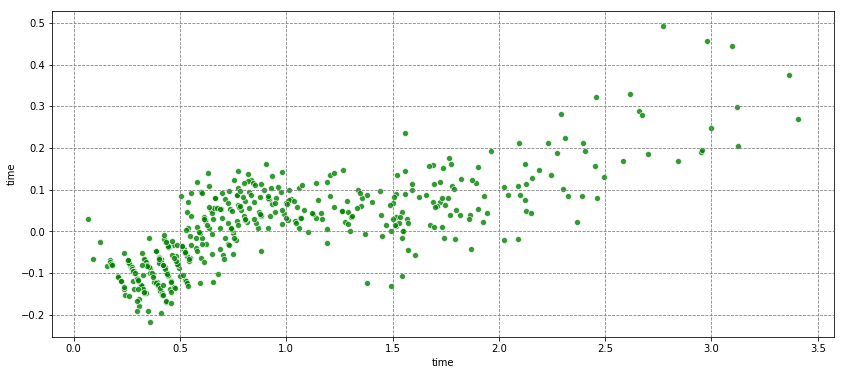

In [141]:
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.grid(True, linestyle='--', color='gray')
sns.scatterplot(temp_plot.iloc[:, 0], temp_plot.iloc[:, 1], alpha=0.8, color='green')

### Ridge

In [142]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [143]:
from sklearn.linear_model import Ridge

In [152]:
params = np.linspace(0.1,10,num=100)
test_scores = []
x1 = temp_plot.iloc[:, 0]
y1 = temp_plot.iloc[:, 1]
x2 = pd.concat([x1, pd.Series(np.ones(len(x1)), index=x1.index)], axis=1)
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, x2, y1, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.65it/s]


In [153]:
clf1_test = Ridge(alpha=20)
clf1_test.fit(x2, y1) 

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
final = rcd + pd.DataFrame(clf1_test.predict(pd.concat([rcd, pd.Series(np.ones(len(rcd)), index=rcd.index)], axis=1)), index=rcd.index, columns=['time'])

In [155]:
gp = final['time'] - y_train

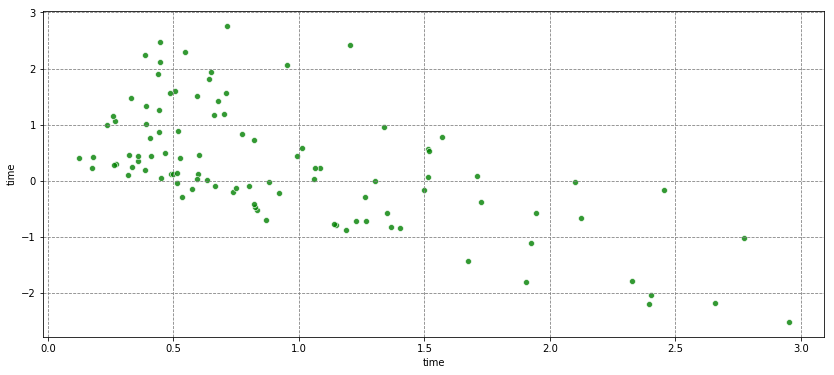

In [156]:
plt.figure(figsize=(14, 6))
plt.grid(True, linestyle='--', color='gray')
sns.scatterplot(temp_plot.iloc[:, 0], gp, alpha=0.8, color='green')

In [149]:
### x for all, then consider 15-22 X>5

In [151]:
x_gp2 = pd.concat([rcd.loc[gp2.index], pd.Series(np.ones(len(gp2)), index=gp2.index)], axis=1)
clf_gp2 = Ridge(alpha=20)
clf_gp2.fit(x_gp2, gp2)

C:\Users\hanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [157]:
data =X_test
rcd = pd.DataFrame(np.zeros(len(data)), columns=['time'], index=data.index)
for i in range(N):
    rcd += pd.DataFrame(md[i].predict(data), columns=['time'])
rcd = rcd/N
final = rcd + pd.DataFrame(clf1_test.predict(pd.concat([rcd, pd.Series(np.ones(len(rcd)), index=rcd.index)], axis=1)), 
                           index=rcd.index, columns=['time'])

In [158]:
final[final<0] = 0.2

In [160]:
np.expm1(final).to_csv('test_sep1.csv')